Slope (m): 1.170271919233245, Intercept (c): 1.23275836594068
Final MSE: 0.5624280101749715


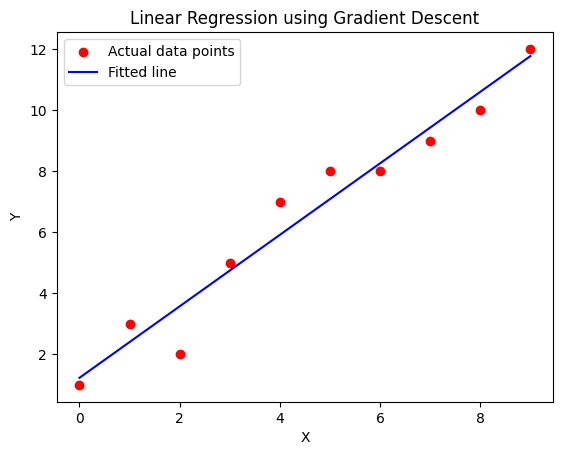

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

m = 0
c = 0
lr = 0.001
loop = 10000

def gradient_descent(X, Y, m, c, lr, loop):
    for _ in range(loop):
        Y_pred = m*X + c
        mse = np.mean((Y - Y_pred)**2)

        dm = -2*np.mean(X * (Y - Y_pred))
        dc = -2*np.mean(Y - Y_pred)

        m = m - lr * dm
        c = c - lr * dc
        
    return m, c, mse

m, c, final_mse = gradient_descent(X, Y, m, c, lr, loop)
print(f"Slope (m): {m}, Intercept (c): {c}")
print(f"Final MSE: {final_mse}")

plt.scatter(X, Y, color='red', marker='o', label='Actual data points')
plt.plot(X, m*X + c, color='blue', label='Fitted line')
plt.title('Linear Regression using Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
import requests

response = requests.get("http://lib.stat.cmu.edu/datasets/boston")
content = response.text

print(content[:10000])


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


reg = LinearRegression()
reg.fit(X_train, y_train)
_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, _pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 22.445284813873673
